# TEST 1

In [1]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import imageio

d:\ProgramData\Python\lib\importlib\__init__.py:127: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


## MASK

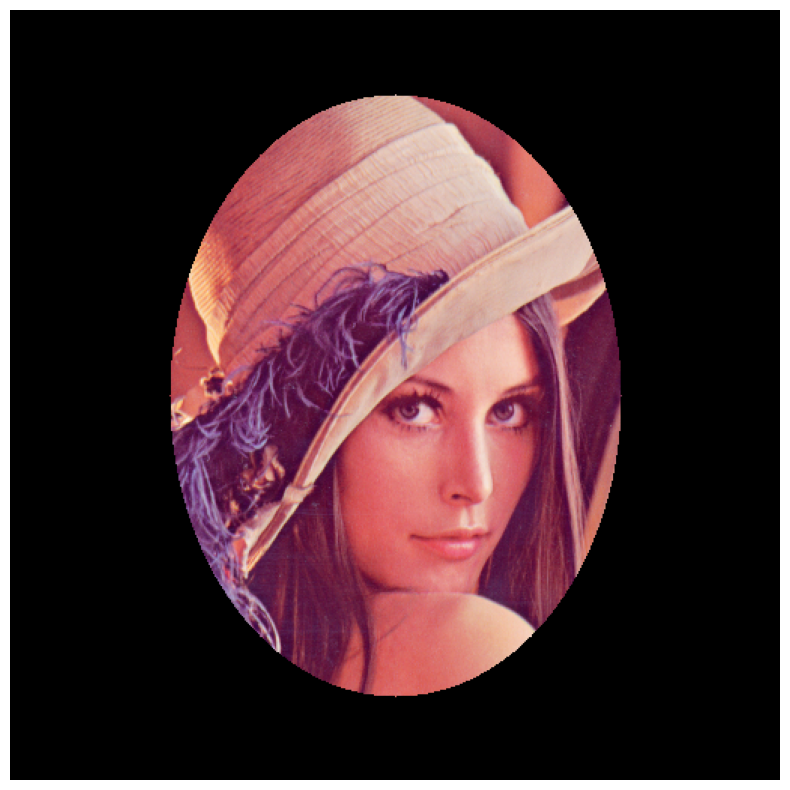

(<matplotlib.image.AxesImage at 0x232ca0035e0>,
 (-0.5, 511.5, 511.5, -0.5),
 None)

In [43]:
lena = mpimg.imread("../images/Lena.png")
lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]

# # circle mask
# mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4

# # rhombus mask
# cx, cy = lx/2, ly/2
# mask = abs(X-cx) + abs(Y-cy) > cx

# # square/rectangle mask
# topX, topY, botX, botY = 50, 50, lx-50, ly-50
# mask = (X < topX) + (Y < topY) + (X > botX) + (Y > botY)

# elipse mask
a, b = 200, 150
mask = ((X - lx/2)**2 / a**2) + ((Y - ly/2)**2 / b**2) > 1

lena[mask,:] = 0 # masks
plt.figure(figsize=(10,10))
plt.imshow(lena), plt.axis('off'), plt.show()


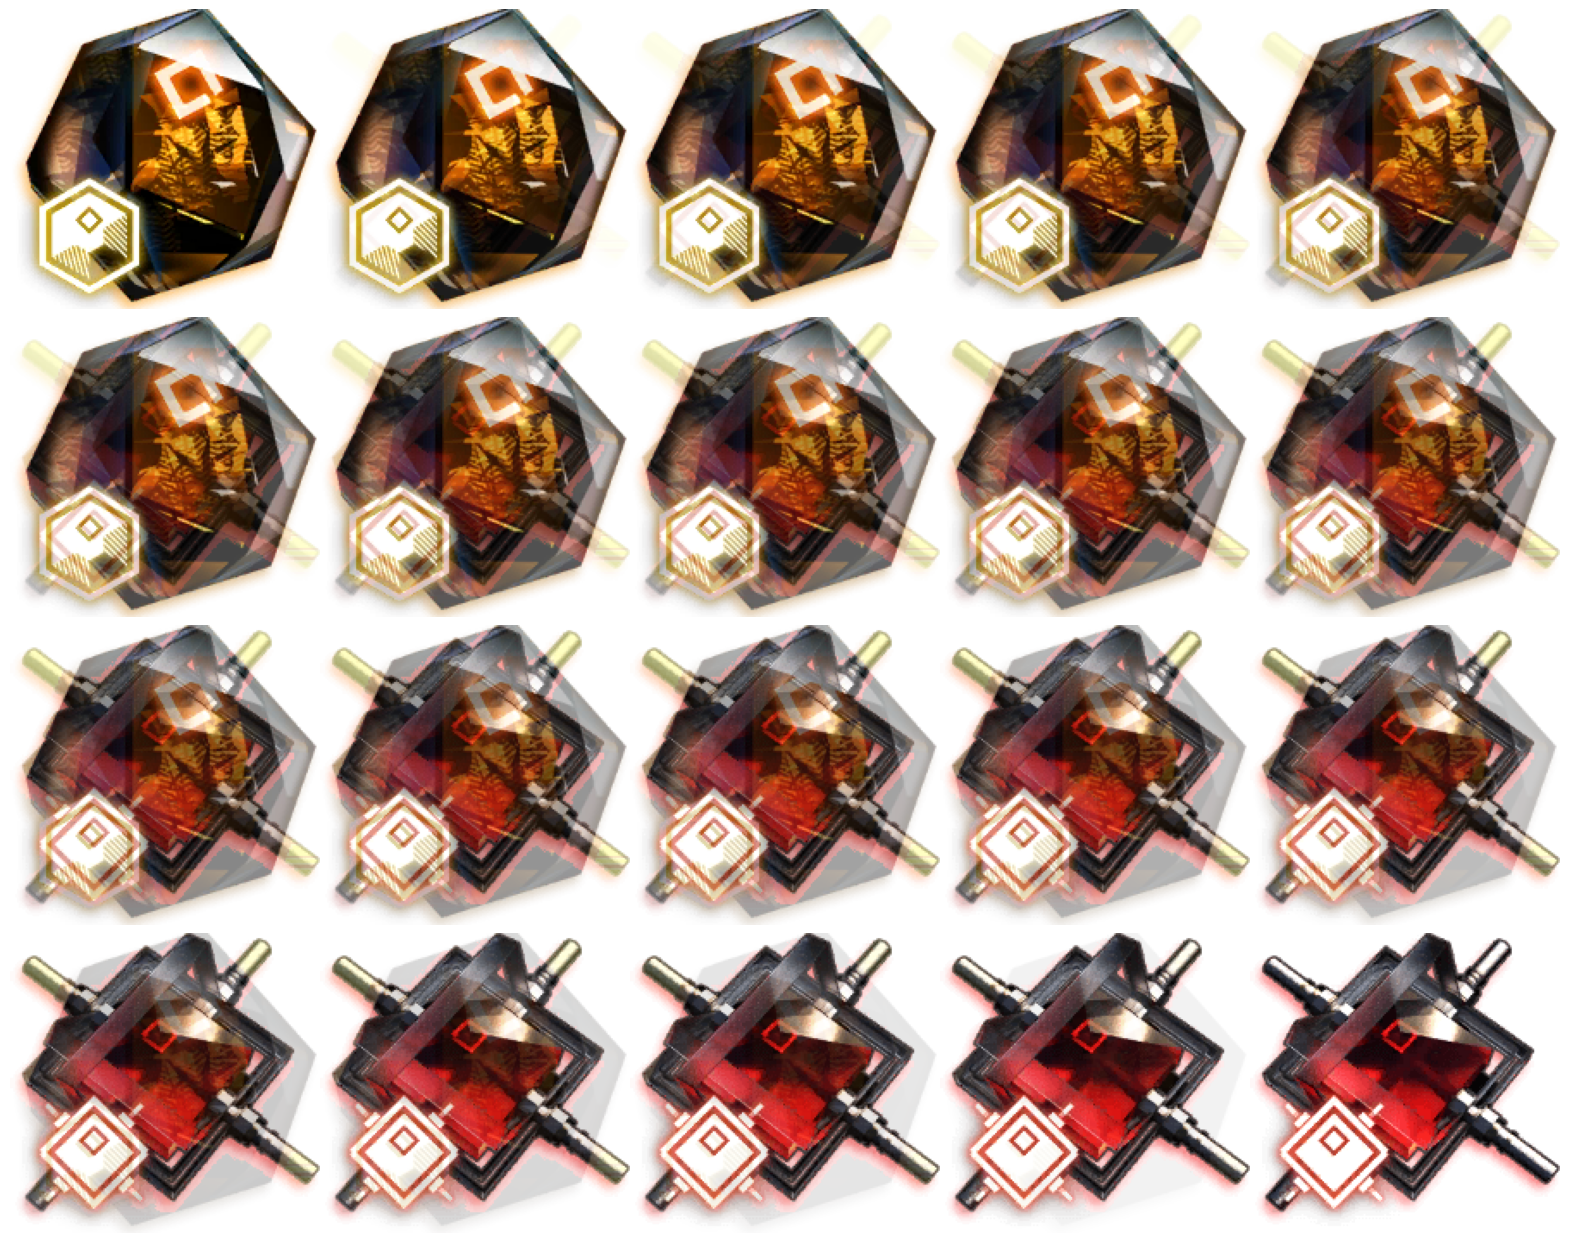

In [3]:
im1 = mpimg.imread("../images/Originite_Prime.png")[4:178,...]
im2 = mpimg.imread("../images/Orundum.png")

i = 1
plt.figure(figsize=(20,16))
for alpha in np.linspace(0,1,20):
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("../images/PO_and_Ori.png")
plt.show()


## RESIZE IMAGE

### UPSCALE

In [4]:
im = Image.open("../images/Headhunt10.png")
im_large = im.resize((im.width*5, im.height*5), Image.Resampling.BILINEAR)
im_large.save("../images/Headhunt10_large.png")
im_large.show()

### DOWNSCALE

In [5]:
im = Image.open("../images/arknightsc8.jpg")
im_small = im.resize((im.width//2, im.height//2), Image.Resampling.LANCZOS)
im_small.save("../images/arknightsc8_small.jpg")
im_small.show()

## NEGATING

In [6]:
im = Image.open("../images/RhodesUnion.jpg")
im_t = im.point(lambda x: 255 - x)
im_t.show()

## REFLECTING AND ROTATING

In [7]:
im.transpose(Image.Transpose.FLIP_LEFT_RIGHT).show()

im.rotate(60).show()

## ADD NOISE

In [8]:
im = Image.open("../images/lowlight_with_power.png")
n = 50000
x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height, n)
for (x,y) in zip(x,y):
    r,g,b = np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256)
    im.putpixel((x, y), (r,g,b)) # salt-and-pepper noise
im.show()


## DRAW

In [14]:
im = Image.open("../images/arknightsc8_small.jpg")
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("../fonts/AegirSeaborn.ttf", 69) # use a truetype font
draw.text((10, 5), "Welcome to image processing with python", font=font)
del draw
im.show()

## CREATING THUMBNAIL

In [16]:
im = Image.open("../images/SilverAsh.png")
im_thumbnail = im.copy() # need to copy the original image first
im_thumbnail.thumbnail((300,300))
# now paste the thumbnail on the image
im.paste(im_thumbnail, (10,10))
# im.save("../images/parrot_thumb.jpg")
im.show()


## BASIC STATISTIC

In [25]:
im = Image.open("../images/arknightsc8.png")
s = stat.Stat(im)
print(s.extrema) # maximum and minimum pixel values for each channel R, G,B
print(s.count)
print(s.mean)
print(s.median)
print(s.stddev)

[(0, 255), (0, 255), (0, 255)]
[15999000, 15999000, 15999000]
[90.89362203887742, 56.51252584536534, 44.71539152447028]
[61, 29, 22]
[82.5043946447408, 64.45353136054344, 54.6140593252601]


d:\ProgramData\Python\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


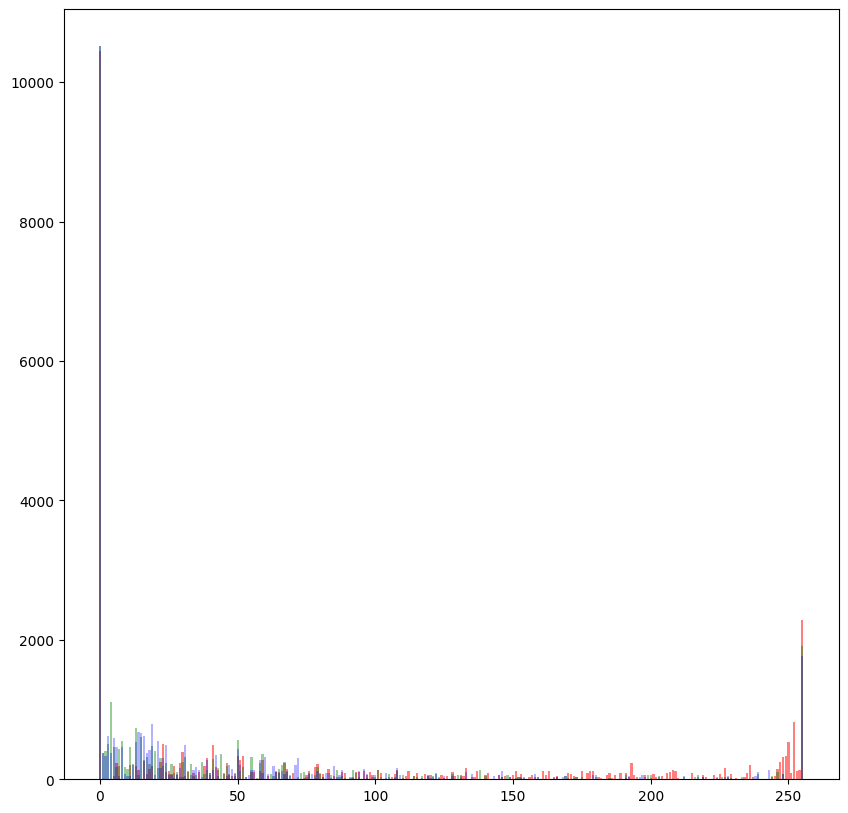

In [28]:
im = Image.open("../images/Orundum.png").convert("RGB")
pl = im.histogram()
plt.figure(figsize=(10,10))
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

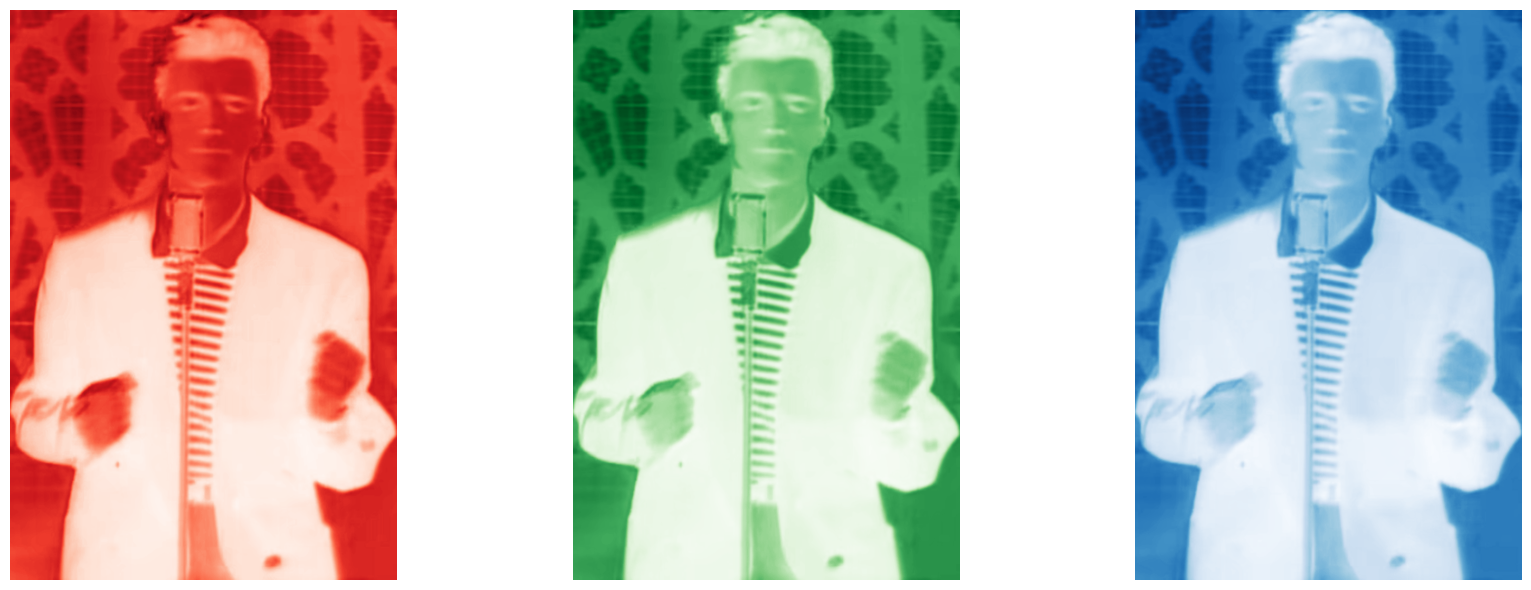

In [36]:
im = Image.open("../images/rick.png").convert("RGB")
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

In [37]:
im = Image.merge('RGB', (ch_b, ch_g, ch_r)) # swap the red and blue channels obtained last time with split()
im.show()

## ALPHA BLENDING TWO IMAGE

In [5]:
im1 = Image.open("../images/Orundum.png").convert("RGBA")
im2 = Image.open("../images/Originite_Prime.png").convert("RGBA")

im2 = im2.resize((im1.width, im1.height), Image.Resampling.BILINEAR) 

im = Image.blend(im1, im2, alpha=0.8).show()
# multiply(im1, im2).show()
# add(im1, im2).show()

## COMPUTE DIFFIRENT

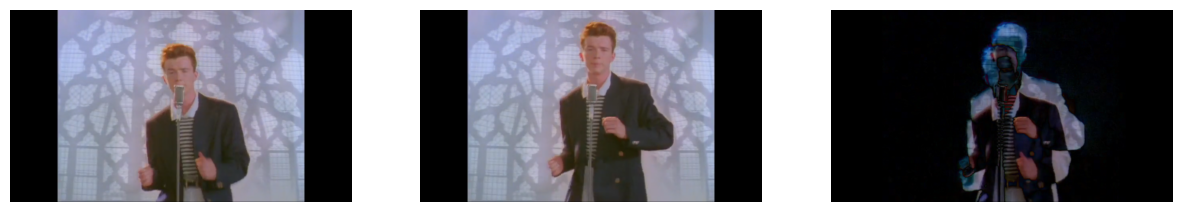

In [21]:
im1 = Image.open("../images/rick1.png").convert("RGB")
im2 = Image.open("../images/rick2.png").convert("RGB")
# if mode is RGBA, im diff is have alpha 0
im = difference(im1,im2)
# im.save("../images/rick_diff.png")
# im = abs(np.array(im1) - np.array(im2))
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(im1), plt.axis(False)
plt.subplot(132), plt.imshow(im2), plt.axis(False)
plt.subplot(133), plt.imshow(im), plt.axis(False)
plt.show()
